# 離散型確率変数

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

%precision 3

np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

## １次元の離散型確率変数
#### 離散型確率変数
とりうる値が離散的な確率変数のこと。

### １次元の離散型確率変数の定義
#### 確率質量関数(PMF: Probability Mass Function)
確率をとりうる値 x を引数にとる関数 f(x) と考えること。
**確率関数**とも呼ぶ。

#### 確率分布
とりうる値とその確率の具体的な対応。
確率変数の確率分布が決まることで、その確率変数の振る舞いが定まることになる。

いかさまサイコロを例にして Python で確認してみる

In [48]:
# とりうる値の集合（配列を使用）を x_set として定義
x_set = [1, 2, 3, 4, 5, 6]

確率分布を確率関数で定義していく

In [49]:
# 確率関数(PMF: Probability Mass Function) を定義する
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

とりうる値の集合と確率関数の Set が確率分布。これによって確率変数 `X` の振る舞いがきまるため、`X` は `x_set` と `f` を要素にもつ List として実装する

In [50]:
X = [x_set, f]

In [51]:
# 確率 p_k を求める
prob = np.array([f(x_k) for x_k in x_set])
# x_k と p_k の対応を辞書型にして表示
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

とりうる値と確率の対応を棒 Graph にして確率分布がどのようになっている視覚的に理解する

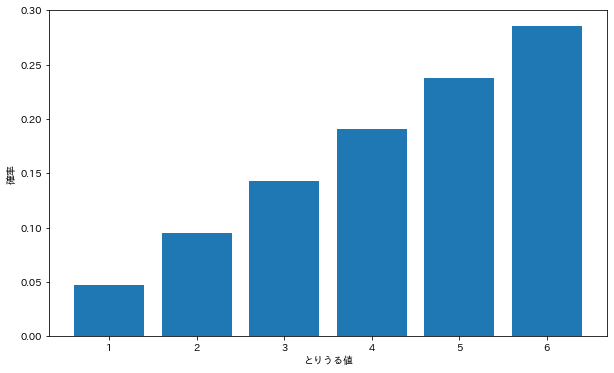

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')

plt.show()

#### 確率の性質
確率は絶対に０以上で、すべての確率を足すと１にならなければならない。

In [53]:
# 確率のすべての要素が０以上か確認する
np.all(prob >= 0)

True

In [54]:
# 確率の総和が１になっていることを確認する
np.sum(prob)

1.000

#### 累積分布関数（CDF: Cumulative Distribution Function）
確率変数 X が x 以下になるときの確率を返す関数
分布関数ともいう

In [55]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [56]:
F(3)

0.286

#### 確率変数の変換
確率変数 X に 2 をかけて 3 を足した 2x + 3 といったもので、確率変数を標準化するときなどに重要となる操作

In [57]:
# 2X + 3 を確率変数 Y として Y の確率分布を計算する
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

確率変数は、確率変数を定義でき、変換後も確率変数になるということを押さえておく

### １次元の離散型確率変数の指標

#### 期待値(expected value)
- 確率変数についての平均は確率変数の中心を表す指標
- 確率変数を何回も（無限回）試行して得られた実現値の平均を指す
- 確率変数のとりうる値とその確率の積の総和として定義される
- 記号として μ E(X) という表記がよく使用される
  - E(X): 演算としての意味合いが強いとき
  - μ: 値そのものに関心がある場合

In [58]:
# サイコロの期待値を定義通り計算してみる
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [59]:
# 100万(=100 ** 6)回サイコロを振った実現値の平均
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.331

定義通り計算した期待値と一致

交換した確率変数もまた確率変数。そのため交換した確率変数の期待値もも考えることができ、標準化した確率分布の期待値を扱う上で重要になってくる。

In [60]:
# 交換した確率変数の期待値の関数
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [61]:
# g に何も指定しなければ確率変数 X の期待値を求める
E(X)

4.333

In [62]:
# 確率変数 Y = 2X + 3 の期待値を求める
E(X, g=lambda x: 2*x + 3)

11.667

期待値には線形性という性質があり。その性質を使うことで交換をした確率変数の期待値を、X の期待値で求めることができる。

In [63]:
# E(2X + 3) が 2E(X) + 3 と等しいか確認してみる
2 * E(X) + 3

11.667

#### 分散
- 確率変数の分散も、ばらつきを表す指標。
- 離散型確率変数の場合、分散は偏差の二乗の期待値として定義される
- 記号として、σ^2 や V(X) という表記がよく使われる。（※ σ は確率変数 X の標準偏差を表す）
  - V(X)演算としての意味合いが強い
  - σ^2: 分散の値そのものに関心がある場合

In [64]:
mean = E(X)
np.sum([(x_k-mean) ** 2 * f(x_k) for x_k in x_set])

2.222

変換した確率変数についても分散を定義できる

In [65]:
# 分散の関数として実装。引数 g が確率変数に対する変換の関数
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])

In [66]:
# g を指定しなければ確率変数 X の分散を計算
V(X)

2.222

In [67]:
# 確率変数 Y = 2X + 3 の分散を計算
V(X, lambda x: 2*x + 3)

8.889

In [68]:
# 分散の公式
2**2 * V(X)

8.889

## ２次元の離散型確率変数

### ２次元の離散型確率変数の定義

#### 同時確率分布(joint probability distribution)
- 確率変数(X, Y)の振る舞いを同時に考えた分布のこと
  - ２次元の確率変数では、１次元の確率変数を２つ同時に扱う。
  - その振る舞いは、とりうる値の組み合わせの集合とその確率によって定まる。
- 単に同時分布ともいう
- ２次元確率分布の確率は x と y を引数にとる関数とみることができる。そのような関数を **同時確率関数(joint probability function)** という

#### 確率の性質
- ２次元の離散型確率変数も、確率は必ず０以上で全確率が１でなければならない

In [69]:
# X と Y のとりうる値の集合をそれぞれ定義
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [70]:
# 同時確率関数を定義
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x - y) / 441
    else:
        return 0

In [71]:
# 確率変数(X, Y)の振る舞いは x_set と y_set と f_xy によって定義されるので、List にして XY とする
XY = [x_set, y_set, f_XY]

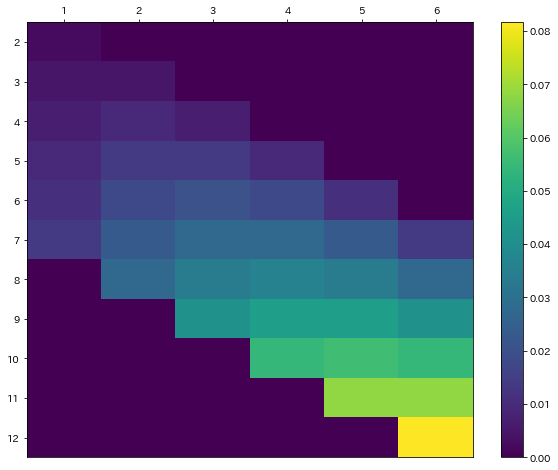

In [72]:
# 確率分布を Heatmap を使って図示
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y軸を下が大きい数字になるように、上下逆転させる
ax.invert_yaxis()
# x軸の目盛りを Graph の上側に表示
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

確率の性質が満たされているか確認していく

In [73]:
# 確率が必ず０以上になっているか
np.all(prob >= 0)

True

In [74]:
# 確率の総和が１になっているか
np.sum(prob)

1.000

#### 周辺確率分布(marginal probability distribution)
- 同時確率関数から一方の確率変数のとりうる値すべてを代入して求めた残った一方の確率変数の確率関数のこと
- **周辺分布** ともいう。

In [75]:
# 確率変数 X の周辺確率分布
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [76]:
# 確率変数 Y の周辺確率分布
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

周辺分布が求まったことで、X と Y をそれぞれ独立に考えることができる

In [77]:
X = [x_set, f_X]
Y = [y_set, f_Y]

X, Y それぞれの確率分布を図示し、prob_x と prob_y がぞれぞれ確率としての性質を満たしていることを確認する

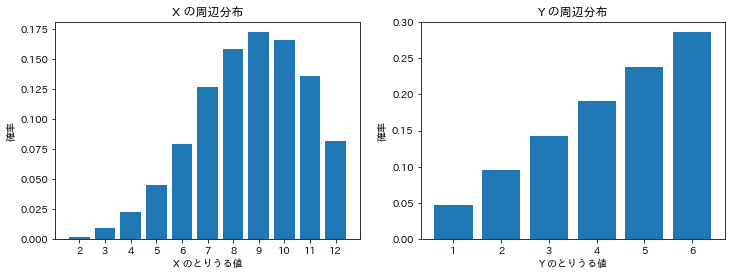

In [78]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X の周辺分布')
ax1.set_xlabel('X のとりうる値')
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y の周辺分布')
ax2.set_xlabel('Y のとりうる値')
ax2.set_ylabel('確率')

plt.show()

### ２次元の離散型確率変数の指標
期待値や分散といった指標のほか、共分散や相関係数といった指標を定義できる

#### 期待値
- X の期待値であれば x_i と確率の積の和で求めることができる

In [79]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [80]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [81]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [82]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

期待値の線形性が成り立っているかを確かめる

In [83]:
a, b = 2, 3

In [85]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [86]:
a * mean_X + b * mean_Y

30.333

#### 分散
X の分散であれば X についての偏差の二乗の期待値によって求めることができる

In [87]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444

In [89]:
# 分散の関数として定義
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [91]:
# X の分散
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [92]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

#### 共分散
共分散を使うことで２つの確率変数X, Y の間にどの程度相関があるか確認できる

In [94]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [95]:
cov_xy = Cov(XY)
cov_xy

2.222

分散と共分散の公式を、V(2X +3Y) = 4V(X) + 9V(Y) + 12Cov(X, Y) で確かめる

In [96]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [99]:
a ** 2 * var_X + b ** 2 * var_Y + 2 * a * b * cov_xy

64.444

#### 相関係数
- 共分散をそれぞれの標準偏差で割ることで求まる
- 記号には ρ（ロー） が使われる

In [100]:
cov_xy / np.sqrt(var_X * var_Y)

0.707